In [44]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import seaborn as sns
import matplotlib._color_data as mcd

folder = [x for x in Path('model_output/').glob('*') if not x.is_file()]

comp = 'diffI'

all_sim = {}

for fold in folder:
    if ('importation' not in str(fold)):
        data = []
        print(f'loading {str(fold)[13:]} ... ', end = '')

        for filename in Path(str(fold)).rglob('*.csv'):

            sim = pd.read_csv(filename)
            sim = sim[sim['comp']==comp]
            sim.drop('comp', axis =1, inplace=True)
            sim.set_index('time', inplace = True)
            sim = sim.sum(axis = 1)
            data.append(sim)
        data = pd.concat(data,axis=1)
        print(f'... {len(data.columns)} loaded')
        all_sim[str(fold)[13:]] = data


loading mid-west-coast-AZ-NV_NoAlpha ... ... 50 loaded
loading mid-west-coast-AZ-NV_WithAlpha ... ... 50 loaded
loading mid-west-coast-AZ-NV_SocialDistancingLong ... ... 50 loaded


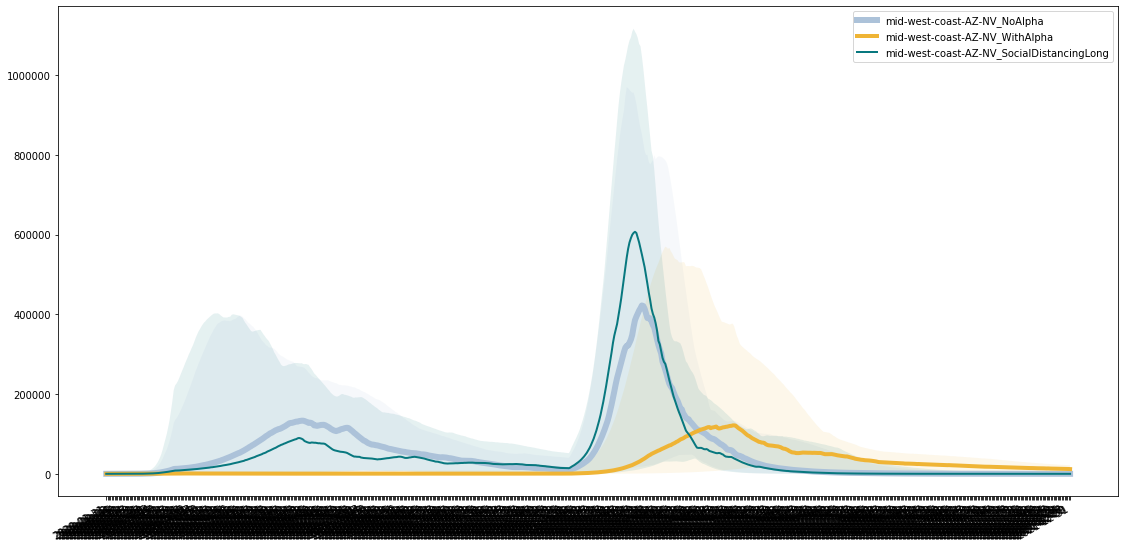

In [46]:
fig, axes = plt.subplots(1,1, figsize =(19,10))
i = 0
for key, value in all_sim.items():
    axes.plot(value.quantile(.5, axis = 1), label = key, c = list(mcd.XKCD_COLORS)[i*15],
             linewidth = 8-i*2)
    axes.fill_between(value.index, value.quantile(.05, axis = 1), 
                      value.quantile(.95, axis = 1), alpha =.1, 
                      facecolor=list(mcd.XKCD_COLORS)[i*15])
    i +=1
    
#axes.set_ylim(0,200000)
axes.legend()
#axes.set_xlim(300,600)
fig.autofmt_xdate()


In [12]:
all_sim.keys()

dict_keys(['mid-west-coast-AZ-NV_SocialDistancingLong'])

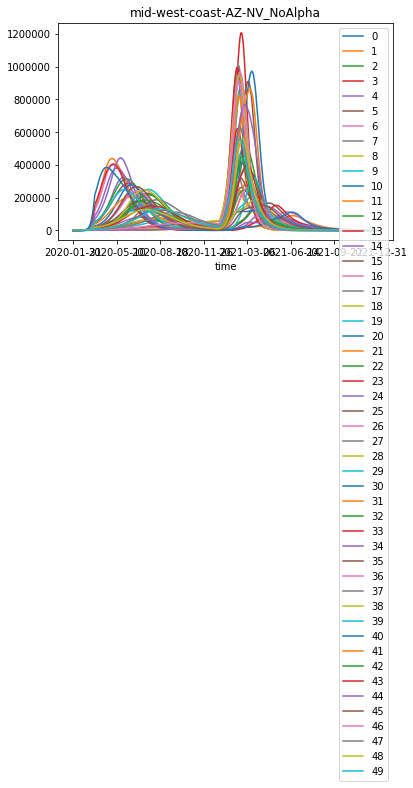

In [47]:
key = list(all_sim.keys())[0]

all_sim[key].plot(title = key)


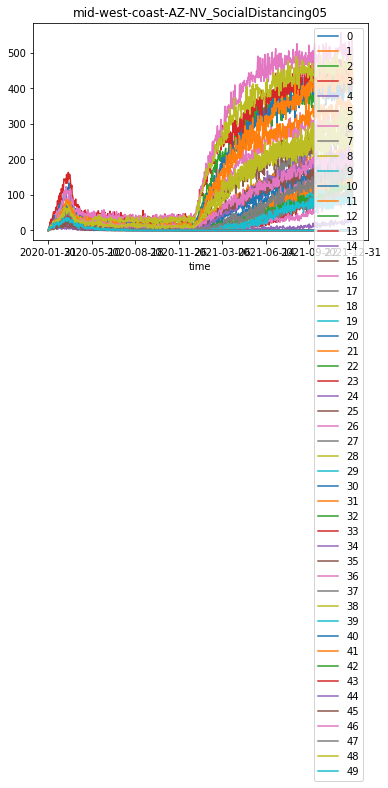

In [25]:
key = list(all_sim.keys())[1]

all_sim[key].plot(title = key)
